 # <font color='red' style='font-family:font_family name'><center> Telecom Project</center></font>

 ## <font color='violet'> 1- Unsupervised machine learning </font>

In [2967]:
#Importing useful modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc as pyodbc
import seaborn as sns

In [2968]:
#connection = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};SERVER=localhost;PORT=1433;DATABASE=DW_Telecom;Trusted_connection=yes')
#cursor = connection.cursor()
#cursor.execute("SELECT distinct([Client_PK]) FROM [dbo].[FaitSurvey] F join [dbo].[DimClient] C on F.Client_FK=C.DimClient_PK order by [Client_PK]")
#rows = cursor.fetchall()
#for row in rows:
#    print(row)

In [2969]:
#Loading data frame 
df = pd.read_excel('data/final_excel_data_5555.xls')
#The first 3 rows of our dataframe
df.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,3 - [4] S0.1 Code ville,4 - [12] S0.2. Sexe :,7 - [14] Date de passation du questionnaire,"8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?",10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?,"15 - [20] S5. Et quel est l’opérateur principal, cest-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ?",20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?,...,130 - [159] Q37.3 La solution qui vous a été proposée,132 - [160] Q39.1 La compréhension de votre demande,133 - [161] Q39.2 La réponse qui vous a été apportée,134 - [162] Q39.3 La rapidité du traitement de votre demande,135 - [163] Q39.4 La résolution de votre problème/demande grâce à ce message sur les réseaux sociaux ou cette visite sur le site Internet de l’opérateur,"142 - [174] Q41. Globalement, sur une échelle de 1 à 10, comment évaluez-vous le ou les systèmes de facturation proposés par [V15] ?",143 - [176] Q42.1 Le délai de réception de la facture,144 - [177] Q42.2 La facilité à comprendre la facture,145 - [178] Q42.3 La justesse de votre facture,"147 - [179] Q44. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la qualité du service de distribution de crédit centralisé ?"
0,0,0,0,TUNIS,H,14/03/2019,20,Industrie,Ooredoo,1,...,1,4,5,5,4,4,5,6,7,4
1,1,1,1,TUNIS,H,16/03/2019,10,Industrie,Orange,3,...,1,4,5,5,4,4,5,6,7,4
2,2,2,2,TUNIS,F,16/03/2019,11,Services,Orange,3,...,1,4,5,5,4,4,5,6,7,4


In [2970]:
#Information about our DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Columns: 101 entries, Unnamed: 0 to 147 - [179] Q44. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la qualité du service de distribution de crédit centralisé ?
dtypes: int64(96), object(5)
memory usage: 1.1+ MB


In [2971]:
#The number of observations and features
df.shape

(1421, 101)

In [2972]:
#Visualizing some basic statistical details like median, mean, std etc
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1421.0,710.000000,410.351678,0.0,355.0,710.0,1065.0,1420.0
Unnamed: 0.1,1421.0,710.000000,410.351678,0.0,355.0,710.0,1065.0,1420.0
Unnamed: 0.1.1,1421.0,710.000000,410.351678,0.0,355.0,710.0,1065.0,1420.0
"8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?",1421.0,22.679099,12.489366,10.0,11.0,20.0,30.0,50.0
20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?,1421.0,1.872625,1.094784,1.0,1.0,1.0,3.0,5.0
...,...,...,...,...,...,...,...,...
"142 - [174] Q41. Globalement, sur une échelle de 1 à 10, comment évaluez-vous le ou les systèmes de facturation proposés par [V15] ?",1421.0,6.670654,1.723055,1.0,6.0,7.0,8.0,11.0
143 - [176] Q42.1 Le délai de réception de la facture,1421.0,6.557354,1.971375,1.0,6.0,7.0,8.0,11.0
144 - [177] Q42.2 La facilité à comprendre la facture,1421.0,6.747361,1.789701,1.0,6.0,7.0,8.0,11.0
145 - [178] Q42.3 La justesse de votre facture,1421.0,6.613652,1.793748,1.0,6.0,7.0,7.0,11.0


In [2973]:
l = []
for i in np.arange(1,1422):
    l.append(i)

In [2974]:
L = pd.DataFrame(l)
L.head()

,0
0,1
1,2
2,3
3,4
4,5


In [2975]:
df['Client_PK']=L

In [2976]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,3 - [4] S0.1 Code ville,4 - [12] S0.2. Sexe :,7 - [14] Date de passation du questionnaire,"8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?",10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?,"15 - [20] S5. Et quel est l’opérateur principal, cest-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ?",20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?,...,132 - [160] Q39.1 La compréhension de votre demande,133 - [161] Q39.2 La réponse qui vous a été apportée,134 - [162] Q39.3 La rapidité du traitement de votre demande,135 - [163] Q39.4 La résolution de votre problème/demande grâce à ce message sur les réseaux sociaux ou cette visite sur le site Internet de l’opérateur,"142 - [174] Q41. Globalement, sur une échelle de 1 à 10, comment évaluez-vous le ou les systèmes de facturation proposés par [V15] ?",143 - [176] Q42.1 Le délai de réception de la facture,144 - [177] Q42.2 La facilité à comprendre la facture,145 - [178] Q42.3 La justesse de votre facture,"147 - [179] Q44. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la qualité du service de distribution de crédit centralisé ?",Client_PK
0,0,0,0,TUNIS,H,14/03/2019,20,Industrie,Ooredoo,1,...,4,5,5,4,4,5,6,7,4,1
1,1,1,1,TUNIS,H,16/03/2019,10,Industrie,Orange,3,...,4,5,5,4,4,5,6,7,4,2
2,2,2,2,TUNIS,F,16/03/2019,11,Services,Orange,3,...,4,5,5,4,4,5,6,7,4,3
3,3,3,3,TUNIS,F,16/03/2019,11,Services,Orange,3,...,4,5,5,4,4,5,6,7,4,4
4,4,4,4,TUNIS,F,16/03/2019,11,Services,Orange,1,...,4,5,5,4,4,5,6,7,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,1416,1416,1416,TUNIS,F,23/03/2019,24,Industrie,Orange,3,...,4,4,4,4,3,1,1,1,4,1417
1417,1417,1417,1417,TUNIS,F,22/03/2019,50,Services,Orange,1,...,4,4,4,4,7,6,7,6,4,1418
1418,1418,1418,1418,TUNIS,H,23/03/2019,10,Services,Orange,3,...,4,4,4,4,6,6,7,6,4,1419
1419,1419,1419,1419,GABES,H,23/03/2019,10,Banque,Ooredoo,1,...,4,4,4,4,7,7,7,7,4,1420


In [2977]:
l1 = []
for i in np.arange(1,1422):
    l1.append(i)

In [2978]:
L1 = pd.DataFrame(l1)
L1.head()

,0
0,1
1,2
2,3
3,4
4,5


In [2979]:
df['Company_PK']=L1

In [2980]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       '3 - [4] S0.1 Code ville', '4 - [12] S0.2. Sexe :',
       '7 - [14] Date de passation du questionnaire',
       '8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?',
       '10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?',
       '15 - [20] S5. Et quel est l’opérateur principal, cest-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ? ',
       '20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?',
       ...
       '133 - [161] Q39.2 La  réponse qui vous a été apportée',
       '134 - [162] Q39.3 La rapidité du traitement de votre demande',
       '135 - [163] Q39.4 La résolution de votre problème/demande grâce à ce message sur les réseaux sociaux ou cette visite sur le site Internet de l’opérateur',
       '142 - 

In [2981]:
l2 = []
for i in df['3 - [4] S0.1 Code ville']:
    if i=='TUNIS':
        l2.append(1)
    elif i=='SFAX':
        l2.append(2)
    elif i=='GABES':
        l2.append(3)
    elif i=='SOUSSE':
        l2.append(4)
    else:
        l2.append(4)

In [2982]:
L2 = pd.DataFrame(l2)
L2.head()

,0
0,1
1,1
2,1
3,1
4,1


In [2983]:
df['Region_PK']=L2

In [2984]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,3 - [4] S0.1 Code ville,4 - [12] S0.2. Sexe :,7 - [14] Date de passation du questionnaire,"8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?",10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?,"15 - [20] S5. Et quel est l’opérateur principal, cest-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ?",20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?,...,134 - [162] Q39.3 La rapidité du traitement de votre demande,135 - [163] Q39.4 La résolution de votre problème/demande grâce à ce message sur les réseaux sociaux ou cette visite sur le site Internet de l’opérateur,"142 - [174] Q41. Globalement, sur une échelle de 1 à 10, comment évaluez-vous le ou les systèmes de facturation proposés par [V15] ?",143 - [176] Q42.1 Le délai de réception de la facture,144 - [177] Q42.2 La facilité à comprendre la facture,145 - [178] Q42.3 La justesse de votre facture,"147 - [179] Q44. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la qualité du service de distribution de crédit centralisé ?",Client_PK,Company_PK,Region_PK
0,0,0,0,TUNIS,H,14/03/2019,20,Industrie,Ooredoo,1,...,5,4,4,5,6,7,4,1,1,1
1,1,1,1,TUNIS,H,16/03/2019,10,Industrie,Orange,3,...,5,4,4,5,6,7,4,2,2,1
2,2,2,2,TUNIS,F,16/03/2019,11,Services,Orange,3,...,5,4,4,5,6,7,4,3,3,1
3,3,3,3,TUNIS,F,16/03/2019,11,Services,Orange,3,...,5,4,4,5,6,7,4,4,4,1
4,4,4,4,TUNIS,F,16/03/2019,11,Services,Orange,1,...,5,4,4,5,6,7,4,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,1416,1416,1416,TUNIS,F,23/03/2019,24,Industrie,Orange,3,...,4,4,3,1,1,1,4,1417,1417,1
1417,1417,1417,1417,TUNIS,F,22/03/2019,50,Services,Orange,1,...,4,4,7,6,7,6,4,1418,1418,1
1418,1418,1418,1418,TUNIS,H,23/03/2019,10,Services,Orange,3,...,4,4,6,6,7,6,4,1419,1419,1
1419,1419,1419,1419,GABES,H,23/03/2019,10,Banque,Ooredoo,1,...,4,4,7,7,7,7,4,1420,1420,3


In [2985]:
df=df.loc[df["15 - [20] S5. Et quel est l’opérateur principal, cest-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ? "] == 'Tunisie Télécom']

In [2986]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       '3 - [4] S0.1 Code ville', '4 - [12] S0.2. Sexe :',
       '7 - [14] Date de passation du questionnaire',
       '8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?',
       '10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?',
       '15 - [20] S5. Et quel est l’opérateur principal, cest-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ? ',
       '20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?',
       ...
       '134 - [162] Q39.3 La rapidité du traitement de votre demande',
       '135 - [163] Q39.4 La résolution de votre problème/demande grâce à ce message sur les réseaux sociaux ou cette visite sur le site Internet de l’opérateur',
       '142 - [174] Q41. Globalement, sur une échelle de 1 à 10, comment évalu

In [2987]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,3 - [4] S0.1 Code ville,4 - [12] S0.2. Sexe :,7 - [14] Date de passation du questionnaire,"8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?",10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?,"15 - [20] S5. Et quel est l’opérateur principal, cest-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ?",20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?,...,134 - [162] Q39.3 La rapidité du traitement de votre demande,135 - [163] Q39.4 La résolution de votre problème/demande grâce à ce message sur les réseaux sociaux ou cette visite sur le site Internet de l’opérateur,"142 - [174] Q41. Globalement, sur une échelle de 1 à 10, comment évaluez-vous le ou les systèmes de facturation proposés par [V15] ?",143 - [176] Q42.1 Le délai de réception de la facture,144 - [177] Q42.2 La facilité à comprendre la facture,145 - [178] Q42.3 La justesse de votre facture,"147 - [179] Q44. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la qualité du service de distribution de crédit centralisé ?",Client_PK,Company_PK,Region_PK
7,7,7,7,TUNIS,F,17/03/2019,12,Santé (Healthcare),Tunisie Télécom,3,...,5,4,3,2,2,5,4,8,8,1
8,8,8,8,TUNIS,H,17/03/2019,14,Administration/gouvernement (Government and Pu...,Tunisie Télécom,1,...,5,4,1,1,1,1,4,9,9,1
10,10,10,10,TUNIS,H,17/03/2019,13,Assurances,Tunisie Télécom,3,...,5,4,5,6,5,5,4,11,11,1
27,27,27,27,TUNIS,H,15/03/2019,23,Administration/gouvernement (Government and Pu...,Tunisie Télécom,1,...,5,4,5,4,3,3,4,28,28,1
28,28,28,28,TUNIS,F,16/03/2019,12,Banque,Tunisie Télécom,1,...,5,4,6,6,6,7,4,29,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,1392,1392,1392,TUNIS,F,18/03/2019,45,Commerce (détail),Tunisie Télécom,1,...,4,4,8,8,8,9,4,1393,1393,1
1393,1393,1393,1393,TUNIS,F,20/03/2019,50,Commerce (détail),Tunisie Télécom,1,...,4,4,6,7,6,6,4,1394,1394,1
1394,1394,1394,1394,TUNIS,H,21/03/2019,35,Administration/gouvernement (Government and Pu...,Tunisie Télécom,1,...,4,4,8,8,9,9,4,1395,1395,1
1410,1410,1410,1410,TUNIS,F,23/03/2019,23,Commerce (détail),Tunisie Télécom,1,...,4,4,8,8,8,8,4,1411,1411,1


In [2988]:
#Deletion of unnecessary features
df=df.drop(columns=['Unnamed: 0','Unnamed: 0.1.1',
         'Unnamed: 0.1',
        '3 - [4] S0.1 Code ville',
        '4 - [12] S0.2. Sexe :',
        '7 - [14] Date de passation du questionnaire',
        '8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?',
        '10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?',
        "15 - [20] S5. Et quel est l’opérateur principal, cest-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ? "],axis=1)


In [2989]:
#Feature list
df.columns.all

<bound method Index._add_logical_methods.<locals>._make_logical_function.<locals>.logical_func of Index(['20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?',
       '21 - [26] Q01A. Recommanderiez-vous les services de téléphonie mobile de votre opérateur principal [V15]  à vos collègues ou partenaire commercial ?',
       '22 - [27] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?',
       '23 - [29] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?',
       '24 - [30] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?',
       '27 - [34] A TOUS ',
       '28 - [35] Q02. Comment évaluez-vous le COUT GLOBAL d

### As we can see it's going to be difficult to work with those columns names, that's why we will change those names into numbers to simplify the future visualisations

In [2990]:
df = df.values
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,3,1,9,6,5,6,5,6,2,3,...,5,4,3,2,2,5,4,8,8,1
1,1,4,7,6,5,5,3,4,2,2,...,5,4,1,1,1,1,4,9,9,1
2,3,8,5,6,5,8,7,7,7,6,...,5,4,5,6,5,5,4,11,11,1
3,1,8,7,7,6,7,7,6,7,6,...,5,4,5,4,3,3,4,28,28,1
4,1,7,5,7,6,7,7,7,7,6,...,5,4,6,6,6,7,4,29,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1,8,8,7,6,8,8,9,8,7,...,4,4,8,8,8,9,4,1393,1393,1
416,1,7,6,7,6,6,6,6,8,7,...,4,4,6,7,6,6,4,1394,1394,1
417,1,8,8,7,6,8,9,9,8,8,...,4,4,8,8,9,9,4,1395,1395,1
418,1,6,6,6,5,7,7,8,10,9,...,4,4,8,8,8,8,4,1411,1411,1


In [2991]:
df = df.rename(columns={x:y for x,y in zip(df.columns,range(1,len(df.columns)+1))})
df

,1,2,3,4,5,6,7,8,9,10,...,86,87,88,89,90,91,92,93,94,95
0,3,1,9,6,5,6,5,6,2,3,...,5,4,3,2,2,5,4,8,8,1
1,1,4,7,6,5,5,3,4,2,2,...,5,4,1,1,1,1,4,9,9,1
2,3,8,5,6,5,8,7,7,7,6,...,5,4,5,6,5,5,4,11,11,1
3,1,8,7,7,6,7,7,6,7,6,...,5,4,5,4,3,3,4,28,28,1
4,1,7,5,7,6,7,7,7,7,6,...,5,4,6,6,6,7,4,29,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1,8,8,7,6,8,8,9,8,7,...,4,4,8,8,8,9,4,1393,1393,1
416,1,7,6,7,6,6,6,6,8,7,...,4,4,6,7,6,6,4,1394,1394,1
417,1,8,8,7,6,8,9,9,8,8,...,4,4,8,8,9,9,4,1395,1395,1
418,1,6,6,6,5,7,7,8,10,9,...,4,4,8,8,8,8,4,1411,1411,1


### But we are still able to restore the names of the questions if needed

In [2992]:
connection = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};SERVER=localhost;PORT=1433;DATABASE=DW_Telecom;Trusted_connection=yes')
cursor = connection.cursor()
cursor.execute("select * from DimQuestion ")
DimQuestion = cursor.fetchall()
for row in DimQuestion:
    print(row)

(373, 1, '20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?')
(374, 2, '21 - [26] Q01A. Recommanderiez-vous les services de téléphonie mobile de votre opérateur principal [V15]  à vos collègues ou partenaire commercial ?')
(375, 3, '22 - [27] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?')
(376, 4, '23 - [29] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?')
(377, 5, '24 - [30] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?')
(378, 6, '27 - [34] A TOUS ')
(379, 7, '28 - [35] Q02. Comment évaluez-vous le COUT GLOBAL des offres et services de [V15] ?  Ce coût inclut le coût de votre/vos contrat/s, les

In [2993]:
#extracting the name of question with the number "2"
DimQuestion[3][2]# "1" +1 is the number of question  // "2" is the position in the tuple

'23 - [29] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?'

### <font color='pink'> KMeans Clustering </font>

In [2994]:
for i in np.arange(1,df.shape[1]+1):
    for j in np.arange(0,df.shape[0]):
        if df[i][j]==11:
            df[i][j]=5

In [2995]:
Quality_Price = df.loc[:,7:8]
Quality_Price

,7,8
0,5,6
1,3,4
2,7,7
3,7,6
4,7,7
...,...,...
415,8,9
416,6,6
417,9,9
418,7,8


In [2996]:
Quality_Price = Quality_Price.mean(axis=1).round()

In [2997]:
Quality_Price

0      6.0
1      4.0
2      7.0
3      6.0
4      7.0
      ... 
415    8.0
416    6.0
417    9.0
418    8.0
419    4.0
Length: 420, dtype: float64

In [2998]:
RelationClient = df.loc[:,9:15]
RelationClient

,9,10,11,12,13,14,15
0,2,3,9,5,5,3,3
1,2,2,6,3,3,3,3
2,7,6,8,7,7,7,8
3,7,6,7,6,6,6,7
4,7,6,6,7,6,6,7
...,...,...,...,...,...,...,...
415,8,7,8,8,7,8,9
416,8,7,7,6,7,6,7
417,8,8,9,9,8,8,9
418,10,9,8,8,10,10,10


In [2999]:
RelationClient = RelationClient.mean(axis=1).round()

In [3000]:
RelationClient

0      4.0
1      3.0
2      7.0
3      6.0
4      6.0
      ... 
415    8.0
416    7.0
417    8.0
418    9.0
419    5.0
Length: 420, dtype: float64

In [3001]:
Commercial = df.loc[:,16:38]
Commercial

,16,17,18,19,20,21,22,23,24,25,...,29,30,31,32,33,34,35,36,37,38
0,2,1,2,2,8,8,4,6,6,6,...,9,9,9,9,8,1,4,3,4,7
1,2,1,2,2,8,5,5,6,6,6,...,6,2,2,2,1,1,1,1,1,1
2,1,2,2,2,8,7,9,6,6,6,...,8,7,7,7,8,7,7,7,7,7
3,1,2,1,2,8,7,6,6,6,6,...,4,5,5,4,4,5,5,4,5,6
4,1,2,1,2,8,7,6,6,6,6,...,6,6,6,7,6,7,6,6,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1,2,1,2,3,7,7,9,8,9,...,5,1,5,5,1,8,8,9,9,9
416,1,2,1,2,9,7,5,7,7,6,...,5,1,5,5,1,7,6,6,6,6
417,1,1,1,2,8,7,8,8,8,9,...,5,1,5,5,1,8,9,8,8,9
418,2,1,1,4,9,6,6,3,2,2,...,1,1,1,1,1,7,7,7,7,8


In [3002]:
Commercial.drop([16,17,19],axis=1,inplace=True)
Commercial

C:\Users\meddhafer\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,2,8,8,4,6,6,6,6,9,8,9,9,9,9,8,1,4,3,4,7
1,2,8,5,5,6,6,6,6,7,4,6,2,2,2,1,1,1,1,1,1
2,2,8,7,9,6,6,6,6,7,7,8,7,7,7,8,7,7,7,7,7
3,1,8,7,6,6,6,6,6,5,5,4,5,5,4,4,5,5,4,5,6
4,1,8,7,6,6,6,6,6,6,7,6,6,6,7,6,7,6,6,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1,3,7,7,9,8,9,8,1,7,5,1,5,5,1,8,8,9,9,9
416,1,9,7,5,7,7,6,7,1,7,5,1,5,5,1,7,6,6,6,6
417,1,8,7,8,8,8,9,8,1,7,5,1,5,5,1,8,9,8,8,9
418,1,9,6,6,3,2,2,2,1,1,1,1,1,1,1,7,7,7,7,8


In [3003]:
for i in np.arange(0,df.shape[0]):
    if df[18][i]==1:
        df[18][i]=10
    elif df[18][i]==2:
        df[18][i]=1
    elif df[18][i]==3:
         df[18][i]=5

In [3004]:
Commercial = Commercial.mean(axis=1).round()

In [3005]:
Commercial

0      6.0
1      4.0
2      7.0
3      5.0
4      6.0
      ... 
415    6.0
416    5.0
417    6.0
418    4.0
419    3.0
Length: 420, dtype: float64

In [3006]:
Reseau = df.loc[:,39:53]
Reseau

,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,8,3,8,8,8,8,8,1,5,6,5,5,6,6,7
1,5,2,8,8,8,8,8,1,1,6,5,5,6,6,7
2,9,3,8,7,8,7,8,2,6,6,5,5,6,6,7
3,6,3,5,5,6,5,4,2,6,6,5,5,6,6,7
4,7,4,6,7,6,6,7,1,6,6,5,5,6,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,8,4,8,9,9,8,8,2,6,7,7,6,6,8,8
416,6,4,7,7,8,7,7,2,6,7,7,6,6,8,1
417,8,4,8,8,9,9,8,2,6,7,7,6,6,8,1
418,8,3,8,8,8,9,10,2,5,1,1,1,1,1,1


In [3007]:
for i in np.arange(0,df.shape[0]):
    if df[40][i]==2:
        df[40][i]=4
    elif df[40][i]==3:
        df[40][i]=7
    elif df[40][i]==4:
         df[40][i]=10

In [3008]:
for i in np.arange(0,df.shape[0]):
    if df[46][i]==2:
        df[46][i]=10

In [3009]:
df.loc[:,46].value_counts()

10    280
1     140
Name: 46, dtype: int64

In [3010]:
Reseau = Reseau.mean(axis=1).round()

In [3011]:
Reseau

0      6.0
1      6.0
2      7.0
3      6.0
4      6.0
      ... 
415    8.0
416    7.0
417    7.0
418    5.0
419    5.0
Length: 420, dtype: float64

In [3012]:
Internet=df.loc[:,54:92]
Internet

,54,55,56,57,58,59,60,61,62,63,...,83,84,85,86,87,88,89,90,91,92
0,7,7,7,6,7,6,8,7,6,6,...,1,4,5,5,4,3,2,2,5,4
1,7,7,7,6,7,6,8,7,6,6,...,1,4,5,5,4,1,1,1,1,4
2,7,7,7,6,7,6,8,7,6,6,...,1,4,5,5,4,5,6,5,5,4
3,7,7,7,6,7,6,8,7,6,6,...,1,4,5,5,4,5,4,3,3,4
4,7,7,7,6,7,6,8,7,6,5,...,1,4,5,5,4,6,6,6,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,7,7,8,6,7,7,8,7,7,8,...,1,4,4,4,4,8,8,8,9,4
416,7,7,8,6,7,7,8,7,7,8,...,1,4,4,4,4,6,7,6,6,4
417,7,7,8,6,7,8,8,7,8,8,...,1,4,4,4,4,8,8,9,9,4
418,5,7,8,5,7,8,5,7,8,3,...,1,4,4,4,4,8,8,8,8,4


In [3013]:
for i in np.arange(0,df.shape[0]):
    if df[75][i]==1:
        df[75][i]=10
    elif df[75][i]==2:
        df[75][i]=1

In [3014]:
Internet = Internet.mean(axis=1).round()

In [3015]:
Internet

0      5.0
1      5.0
2      6.0
3      6.0
4      6.0
      ... 
415    7.0
416    6.0
417    7.0
418    4.0
419    4.0
Length: 420, dtype: float64

In [3016]:
dfff =pd.DataFrame({'Quality_Price': Quality_Price, 'RelationClient': RelationClient, 'Commercial': Commercial, 'Reseau': Reseau, 'Internet':Internet, 'Client_PK':df[93], 'Company_PK':df[94], 'Region_PK':df[95]})

In [3017]:
dfff

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK
0,6.0,4.0,6.0,6.0,5.0,8,8,1
1,4.0,3.0,4.0,6.0,5.0,9,9,1
2,7.0,7.0,7.0,7.0,6.0,5,5,1
3,6.0,6.0,5.0,6.0,6.0,28,28,1
4,7.0,6.0,6.0,6.0,6.0,29,29,1
...,...,...,...,...,...,...,...,...
415,8.0,8.0,6.0,8.0,7.0,1393,1393,1
416,6.0,7.0,5.0,7.0,6.0,1394,1394,1
417,9.0,8.0,6.0,7.0,7.0,1395,1395,1
418,8.0,9.0,4.0,5.0,4.0,1411,1411,1


In [3018]:
dfff.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,420.0,6.554762,1.200378,4.0,6.0,7.0,7.0,9.0
RelationClient,420.0,6.338095,1.208552,3.0,6.0,7.0,7.0,9.0
Commercial,420.0,6.097619,1.007132,3.0,6.0,6.0,7.0,8.0
Reseau,420.0,6.630952,0.796468,5.0,6.0,7.0,7.0,8.0
Internet,420.0,6.250000,0.742102,4.0,6.0,6.0,7.0,7.0
Client_PK,420.0,719.661905,403.306560,5.0,386.5,708.5,1083.5,1412.0
Company_PK,420.0,719.661905,403.306560,5.0,386.5,708.5,1083.5,1412.0
Region_PK,420.0,1.504762,0.709618,1.0,1.0,1.0,2.0,4.0


In [3019]:
#Loading the KMeans class from cluster module of the sklearn library,
from sklearn.cluster import KMeans
inertia =[]
K = np.arange(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']])
    inertia.append(km.inertia_)

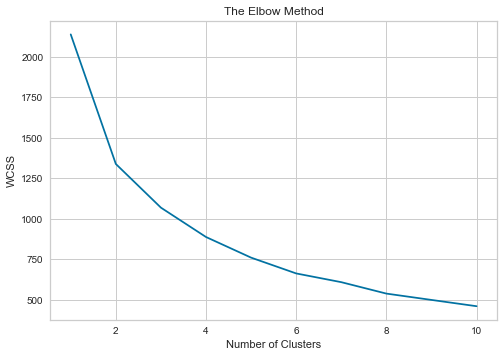

In [3020]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.3475647766333949
For n_clusters = 3 The average silhouette_score is : 0.2994489576313648
For n_clusters = 4 The average silhouette_score is : 0.330489445613215
For n_clusters = 5 The average silhouette_score is : 0.30974581981348753


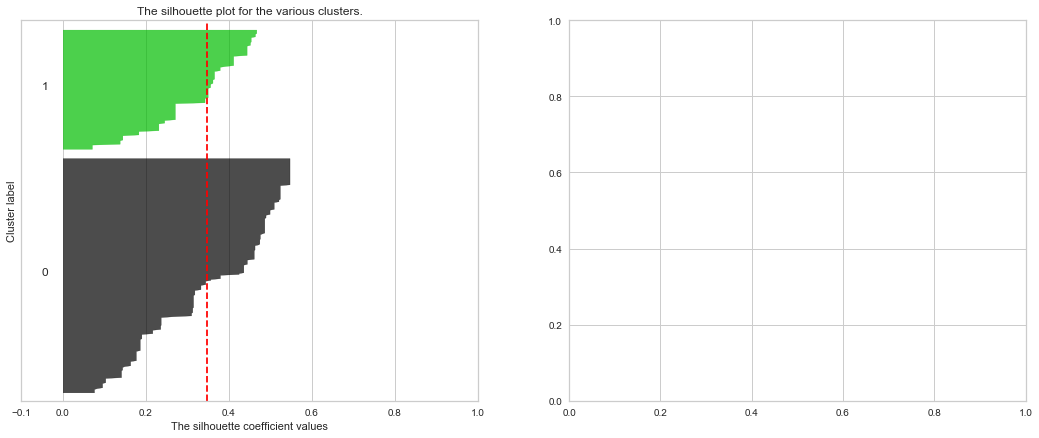

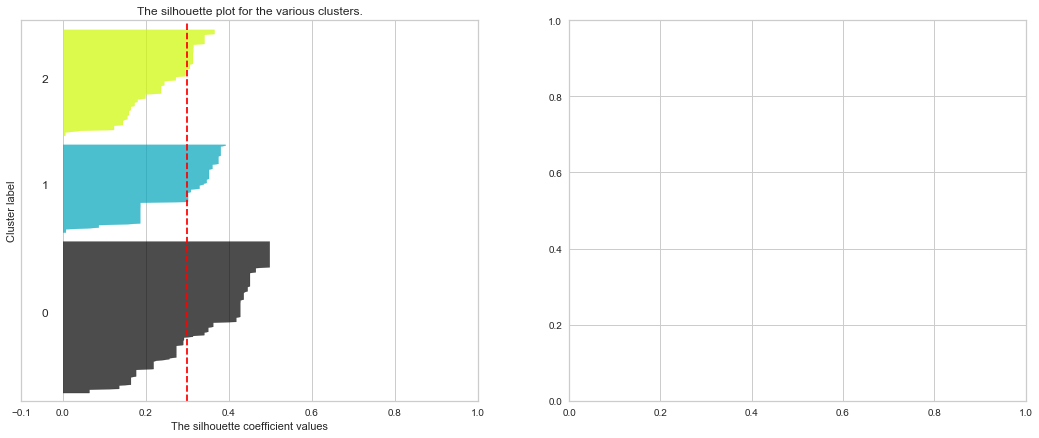

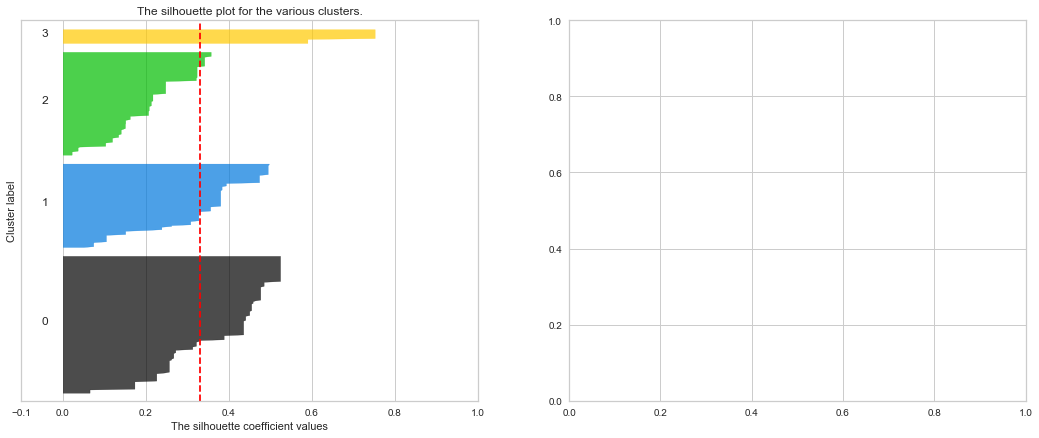

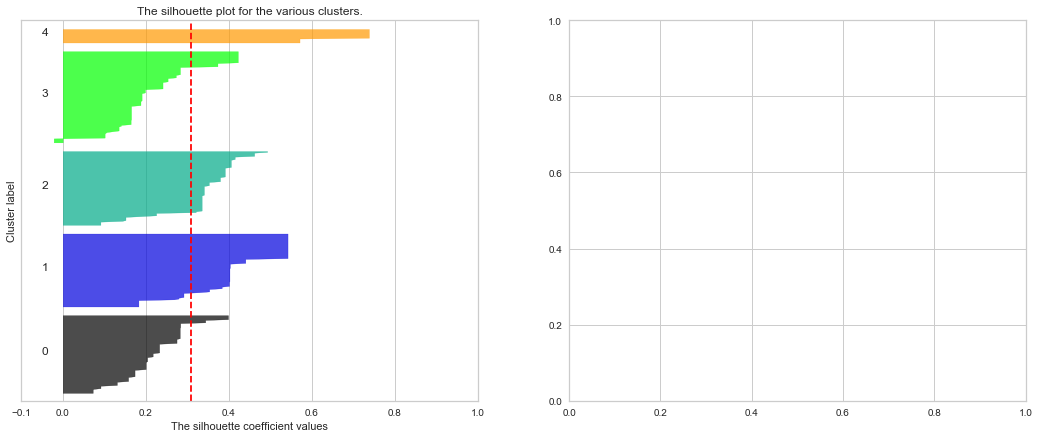

In [3021]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in range(2,6):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dfff) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

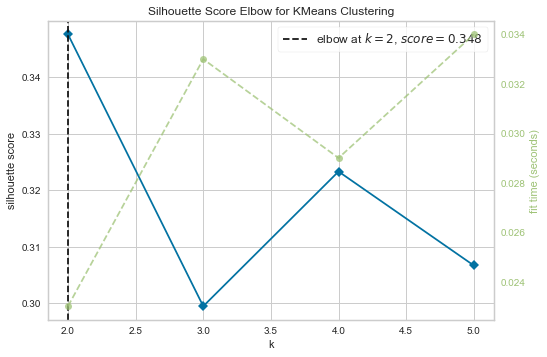

In [3022]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,6),metric='silhouette', timings= True)
visualizer.fit(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

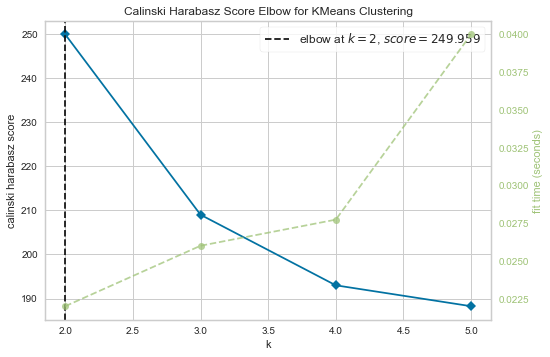

In [3023]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,6),metric='calinski_harabasz', timings= True)
visualizer.fit(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

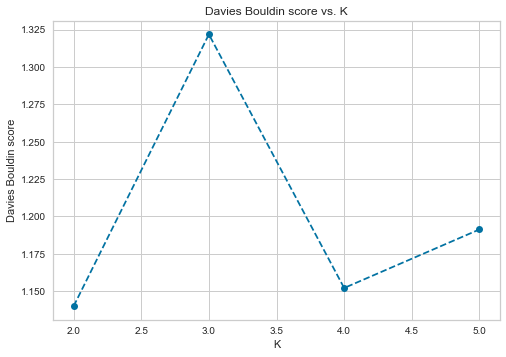

In [3024]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']])
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']], model)
    
    return score
scores = []
centers = list(range(2,6))
for center in centers:
    scores.append(get_kmeans_score(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']], center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

In [3025]:
kmeans = KMeans(n_clusters=2,random_state=2 )
kmeans.fit(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [3026]:
labels = kmeans.labels_

In [3027]:
for i in range(len(labels)):
    print('Index:',i,'Label:',labels[i])

Index: 0 Label: 1
Index: 1 Label: 1
Index: 2 Label: 0
Index: 3 Label: 1
Index: 4 Label: 0
Index: 5 Label: 0
Index: 6 Label: 0
Index: 7 Label: 0
Index: 8 Label: 0
Index: 9 Label: 1
Index: 10 Label: 0
Index: 11 Label: 0
Index: 12 Label: 0
Index: 13 Label: 0
Index: 14 Label: 0
Index: 15 Label: 1
Index: 16 Label: 1
Index: 17 Label: 1
Index: 18 Label: 0
Index: 19 Label: 0
Index: 20 Label: 0
Index: 21 Label: 0
Index: 22 Label: 0
Index: 23 Label: 0
Index: 24 Label: 0
Index: 25 Label: 0
Index: 26 Label: 0
Index: 27 Label: 0
Index: 28 Label: 0
Index: 29 Label: 1
Index: 30 Label: 1
Index: 31 Label: 0
Index: 32 Label: 1
Index: 33 Label: 1
Index: 34 Label: 1
Index: 35 Label: 1
Index: 36 Label: 1
Index: 37 Label: 1
Index: 38 Label: 1
Index: 39 Label: 1
Index: 40 Label: 1
Index: 41 Label: 0
Index: 42 Label: 0
Index: 43 Label: 0
Index: 44 Label: 0
Index: 45 Label: 0
Index: 46 Label: 0
Index: 47 Label: 0
Index: 48 Label: 0
Index: 49 Label: 0
Index: 50 Label: 0
Index: 51 Label: 1
Index: 52 Label: 0
Ind

In [3028]:
l =pd.DataFrame(labels)
l[0].value_counts()

0    278
1    142
Name: 0, dtype: int64

In [3029]:
exp1 = pd.DataFrame(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[19,:])
exp1[19].value_counts()

7.0    3
6.0    1
4.0    1
Name: 19, dtype: int64

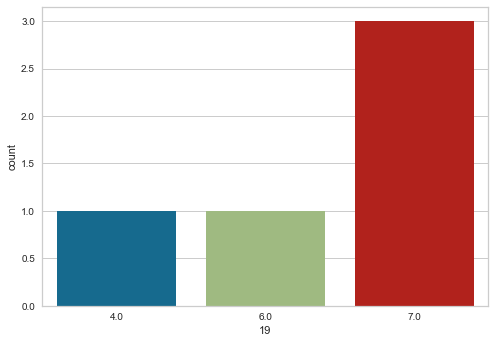

In [3030]:
sns.countplot(x=dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[19,:])

In [3031]:
labels[19]

0

In [3032]:
exp2 = pd.DataFrame(dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[314,:])
exp2[314].value_counts()

7.0    3
6.0    2
Name: 314, dtype: int64

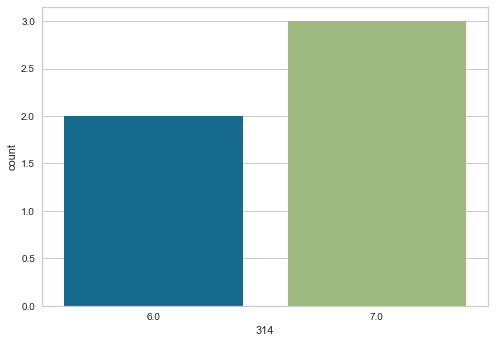

In [3033]:
sns.countplot(x=dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[314,:])

In [3034]:
labels[314]

0

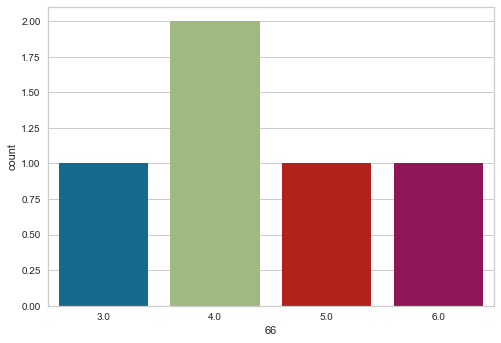

In [3035]:
sns.countplot(x=dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[66,:])

In [3036]:
labels[66]

1

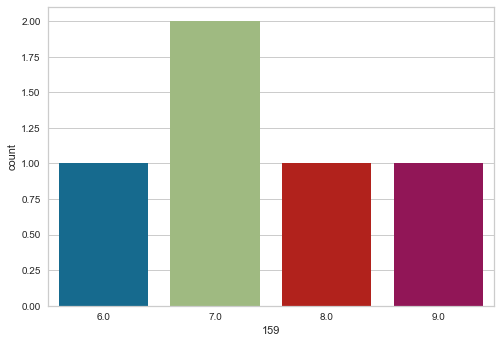

In [3037]:
sns.countplot(x=dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[159,:])

In [3038]:
labels[159]

0

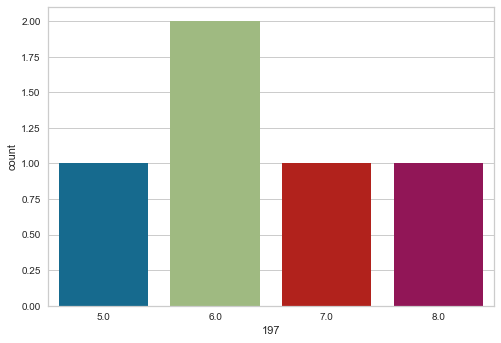

In [3039]:
sns.countplot(x=dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[197,:])

In [3040]:
labels[197]

0

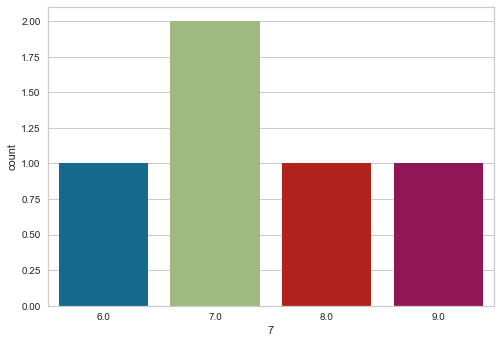

In [3041]:
sns.countplot(x=dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[7,:])

In [3042]:
labels[7]

0

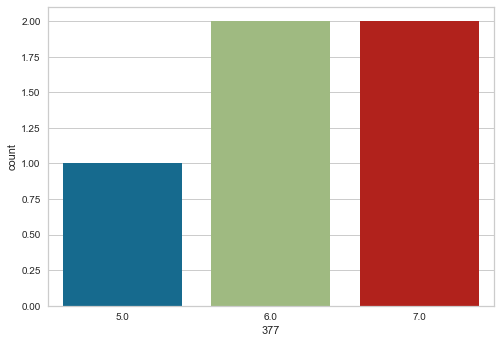

In [3043]:
sns.countplot(x=dfff[['Quality_Price', 'RelationClient', 'Commercial', 'Reseau', 'Internet']].loc[377,:])

In [3044]:
labels[377]

1

In [3045]:
Churn_NoChurnTT = kmeans

In [3046]:
ex2 = [6,7,7,4,5]
ex2 = pd.DataFrame(ex2)
e2 = ex2.T
e2 = e2.rename(columns={x:y for x,y in zip(e2.columns,range(1,len(e2.columns)+1))})
e2

,1,2,3,4,5
0,6,7,7,4,5


In [3047]:
kl = Churn_NoChurnTT.predict(e2.values)
print(kl)

[0]


In [3048]:
l = pd.DataFrame(labels)
l

,0
0,1
1,1
2,0
3,1
4,0
...,...
415,0
416,0
417,0
418,0


In [3049]:
dfc = pd.concat([dfff, l], axis=1)
dfc

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,0
0,6.0,4.0,6.0,6.0,5.0,8,8,1,1
1,4.0,3.0,4.0,6.0,5.0,9,9,1,1
2,7.0,7.0,7.0,7.0,6.0,5,5,1,0
3,6.0,6.0,5.0,6.0,6.0,28,28,1,1
4,7.0,6.0,6.0,6.0,6.0,29,29,1,0
...,...,...,...,...,...,...,...,...,...
415,8.0,8.0,6.0,8.0,7.0,1393,1393,1,0
416,6.0,7.0,5.0,7.0,6.0,1394,1394,1,0
417,9.0,8.0,6.0,7.0,7.0,1395,1395,1,0
418,8.0,9.0,4.0,5.0,4.0,1411,1411,1,0


In [3050]:
df1=dfc.loc[dfc[0] == 1]
df1

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,0
0,6.0,4.0,6.0,6.0,5.0,8,8,1,1
1,4.0,3.0,4.0,6.0,5.0,9,9,1,1
3,6.0,6.0,5.0,6.0,6.0,28,28,1,1
9,4.0,5.0,3.0,5.0,4.0,50,50,1,1
15,6.0,6.0,6.0,6.0,6.0,79,79,2,1
...,...,...,...,...,...,...,...,...,...
405,6.0,6.0,5.0,6.0,5.0,1346,1346,1,1
410,6.0,4.0,6.0,6.0,5.0,1370,1370,1,1
411,4.0,3.0,4.0,6.0,5.0,1371,1371,1,1
413,6.0,6.0,5.0,6.0,5.0,1390,1390,1,1


In [3051]:
dfch=df1.drop([0],axis=1)
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK
0,6.0,4.0,6.0,6.0,5.0,8,8,1
1,4.0,3.0,4.0,6.0,5.0,9,9,1
3,6.0,6.0,5.0,6.0,6.0,28,28,1
9,4.0,5.0,3.0,5.0,4.0,50,50,1
15,6.0,6.0,6.0,6.0,6.0,79,79,2
...,...,...,...,...,...,...,...,...
405,6.0,6.0,5.0,6.0,5.0,1346,1346,1
410,6.0,4.0,6.0,6.0,5.0,1370,1370,1
411,4.0,3.0,4.0,6.0,5.0,1371,1371,1
413,6.0,6.0,5.0,6.0,5.0,1390,1390,1


In [3052]:
dfch.to_excel(r"C:\Users\meddhafer\notebook\data\dfch.xlsx", header=True)

In [3053]:
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK
0,6.0,4.0,6.0,6.0,5.0,8,8,1
1,4.0,3.0,4.0,6.0,5.0,9,9,1
3,6.0,6.0,5.0,6.0,6.0,28,28,1
9,4.0,5.0,3.0,5.0,4.0,50,50,1
15,6.0,6.0,6.0,6.0,6.0,79,79,2
...,...,...,...,...,...,...,...,...
405,6.0,6.0,5.0,6.0,5.0,1346,1346,1
410,6.0,4.0,6.0,6.0,5.0,1370,1370,1
411,4.0,3.0,4.0,6.0,5.0,1371,1371,1
413,6.0,6.0,5.0,6.0,5.0,1390,1390,1


In [3054]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_samples
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

In [3055]:
Z = linkage(dfch[['Quality_Price']],'ward')

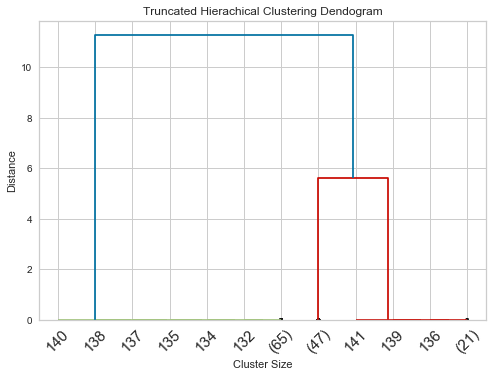

In [3056]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachical Clustering Dendogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [3057]:
Agg = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
Agg.fit_predict(dfch[['Quality_Price']])

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [3058]:
labels = Agg.labels_
for i in range(len(labels)):
    print('Index:',dfch[['Quality_Price']].index[i],'Label:',labels[i])

Index: 0 Label: 1
Index: 1 Label: 0
Index: 3 Label: 1
Index: 9 Label: 0
Index: 15 Label: 1
Index: 16 Label: 1
Index: 17 Label: 1
Index: 29 Label: 0
Index: 30 Label: 0
Index: 32 Label: 0
Index: 33 Label: 0
Index: 34 Label: 1
Index: 35 Label: 0
Index: 36 Label: 0
Index: 37 Label: 1
Index: 38 Label: 1
Index: 39 Label: 1
Index: 40 Label: 1
Index: 51 Label: 0
Index: 57 Label: 1
Index: 58 Label: 0
Index: 60 Label: 1
Index: 65 Label: 1
Index: 66 Label: 0
Index: 68 Label: 1
Index: 73 Label: 1
Index: 74 Label: 0
Index: 76 Label: 1
Index: 82 Label: 0
Index: 88 Label: 1
Index: 89 Label: 1
Index: 90 Label: 1
Index: 102 Label: 0
Index: 103 Label: 0
Index: 105 Label: 0
Index: 106 Label: 0
Index: 107 Label: 1
Index: 108 Label: 0
Index: 109 Label: 0
Index: 110 Label: 1
Index: 111 Label: 1
Index: 112 Label: 1
Index: 113 Label: 1
Index: 124 Label: 0
Index: 148 Label: 0
Index: 149 Label: 0
Index: 150 Label: 0
Index: 151 Label: 0
Index: 152 Label: 1
Index: 153 Label: 0
Index: 155 Label: 1
Index: 161 Label

In [3059]:
l =pd.DataFrame(labels)
l[0].value_counts()

1    71
0    71
Name: 0, dtype: int64

In [3060]:
dfch = dfch.values
dfch = pd.DataFrame(dfch)
dfch

,0,1,2,3,4,5,6,7
0,6.0,4.0,6.0,6.0,5.0,8.0,8.0,1.0
1,4.0,3.0,4.0,6.0,5.0,9.0,9.0,1.0
2,6.0,6.0,5.0,6.0,6.0,28.0,28.0,1.0
3,4.0,5.0,3.0,5.0,4.0,50.0,50.0,1.0
4,6.0,6.0,6.0,6.0,6.0,79.0,79.0,2.0
...,...,...,...,...,...,...,...,...
137,6.0,6.0,5.0,6.0,5.0,1346.0,1346.0,1.0
138,6.0,4.0,6.0,6.0,5.0,1370.0,1370.0,1.0
139,4.0,3.0,4.0,6.0,5.0,1371.0,1371.0,1.0
140,6.0,6.0,5.0,6.0,5.0,1390.0,1390.0,1.0


In [3061]:
dfch['churn_Qual_Price'] = l

In [3062]:
dfch.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 'churn_Qual_Price'], dtype='object')

In [3063]:
dfch = dfch.rename(columns={0:'Quality_Price', 1:"RelationClient",2:"Commercial", 3:'Reseau', 4:'Internet', 5:'Client_PK', 6:'Company_PK', 7:'Region_PK'})
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price
0,6.0,4.0,6.0,6.0,5.0,8.0,8.0,1.0,1
1,4.0,3.0,4.0,6.0,5.0,9.0,9.0,1.0,0
2,6.0,6.0,5.0,6.0,6.0,28.0,28.0,1.0,1
3,4.0,5.0,3.0,5.0,4.0,50.0,50.0,1.0,0
4,6.0,6.0,6.0,6.0,6.0,79.0,79.0,2.0,1
...,...,...,...,...,...,...,...,...,...
137,6.0,6.0,5.0,6.0,5.0,1346.0,1346.0,1.0,1
138,6.0,4.0,6.0,6.0,5.0,1370.0,1370.0,1.0,1
139,4.0,3.0,4.0,6.0,5.0,1371.0,1371.0,1.0,0
140,6.0,6.0,5.0,6.0,5.0,1390.0,1390.0,1.0,1


In [3064]:
j=0
for i in dfch['churn_Qual_Price']:
    if i==0:
        dfch['churn_Qual_Price'][j] = "Unsatisfied by quality_price"
        j=j+1
    else:
        dfch['churn_Qual_Price'][j] = "Other groups"
        j=j+1

C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\meddhafer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from

In [3065]:
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price
0,6.0,4.0,6.0,6.0,5.0,8.0,8.0,1.0,Other groups
1,4.0,3.0,4.0,6.0,5.0,9.0,9.0,1.0,Unsatisfied by quality_price
2,6.0,6.0,5.0,6.0,6.0,28.0,28.0,1.0,Other groups
3,4.0,5.0,3.0,5.0,4.0,50.0,50.0,1.0,Unsatisfied by quality_price
4,6.0,6.0,6.0,6.0,6.0,79.0,79.0,2.0,Other groups
...,...,...,...,...,...,...,...,...,...
137,6.0,6.0,5.0,6.0,5.0,1346.0,1346.0,1.0,Other groups
138,6.0,4.0,6.0,6.0,5.0,1370.0,1370.0,1.0,Other groups
139,4.0,3.0,4.0,6.0,5.0,1371.0,1371.0,1.0,Unsatisfied by quality_price
140,6.0,6.0,5.0,6.0,5.0,1390.0,1390.0,1.0,Other groups


In [3066]:
dfch.to_excel(r"C:\Users\meddhafer\notebook\data\dfch_qual.xlsx", header=True)

In [3067]:
data = dfch[dfch['churn_Qual_Price']=='Unsatisfied by quality_price']
data

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price
1,4.0,3.0,4.0,6.0,5.0,9.0,9.0,1.0,Unsatisfied by quality_price
3,4.0,5.0,3.0,5.0,4.0,50.0,50.0,1.0,Unsatisfied by quality_price
7,5.0,5.0,6.0,8.0,6.0,137.0,137.0,1.0,Unsatisfied by quality_price
8,5.0,5.0,6.0,8.0,6.0,138.0,138.0,1.0,Unsatisfied by quality_price
9,5.0,6.0,5.0,6.0,6.0,145.0,145.0,1.0,Unsatisfied by quality_price
...,...,...,...,...,...,...,...,...,...
131,5.0,5.0,6.0,6.0,6.0,1291.0,1291.0,1.0,Unsatisfied by quality_price
133,4.0,3.0,4.0,6.0,5.0,1311.0,1311.0,1.0,Unsatisfied by quality_price
136,4.0,3.0,4.0,6.0,5.0,1338.0,1338.0,1.0,Unsatisfied by quality_price
139,4.0,3.0,4.0,6.0,5.0,1371.0,1371.0,1.0,Unsatisfied by quality_price


In [3068]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,71.0,4.661972,0.476405,4.0,4.0,5.0,5.0,5.0
RelationClient,71.0,4.746479,0.840379,3.0,5.0,5.0,5.0,6.0
Commercial,71.0,5.323944,1.192532,3.0,4.5,5.0,6.0,7.0
Reseau,71.0,6.619718,0.931454,5.0,6.0,7.0,7.0,8.0
Internet,71.0,5.549296,0.650027,4.0,5.0,6.0,6.0,6.0
Client_PK,71.0,757.492958,402.452406,9.0,392.5,769.0,1103.5,1412.0
Company_PK,71.0,757.492958,402.452406,9.0,392.5,769.0,1103.5,1412.0
Region_PK,71.0,1.366197,0.814852,1.0,1.0,1.0,1.0,4.0


In [3069]:
for i in data.columns:
    print(data[i].value_counts())

5.0    47
4.0    24
Name: Quality_Price, dtype: int64
5.0    53
3.0    12
6.0     6
Name: RelationClient, dtype: int64
6.0    23
5.0    18
7.0    12
4.0    12
3.0     6
Name: Commercial, dtype: int64
6.0    28
7.0    21
8.0    15
5.0     7
Name: Reseau, dtype: int64
6.0    45
5.0    20
4.0     6
Name: Internet, dtype: int64
1371.0    1
568.0     1
413.0     1
514.0     1
515.0     1
         ..
1098.0    1
1106.0    1
1116.0    1
1118.0    1
9.0       1
Name: Client_PK, Length: 71, dtype: int64
1371.0    1
568.0     1
413.0     1
514.0     1
515.0     1
         ..
1098.0    1
1106.0    1
1116.0    1
1118.0    1
9.0       1
Name: Company_PK, Length: 71, dtype: int64
1.0    55
2.0    11
4.0     5
Name: Region_PK, dtype: int64
Unsatisfied by quality_price    71
Name: churn_Qual_Price, dtype: int64


In [3070]:
data1 = dfch[dfch['churn_Qual_Price']=='Other groups']
data1

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price
0,6.0,4.0,6.0,6.0,5.0,8.0,8.0,1.0,Other groups
2,6.0,6.0,5.0,6.0,6.0,28.0,28.0,1.0,Other groups
4,6.0,6.0,6.0,6.0,6.0,79.0,79.0,2.0,Other groups
5,6.0,6.0,6.0,5.0,6.0,90.0,90.0,2.0,Other groups
6,6.0,6.0,6.0,5.0,7.0,91.0,91.0,2.0,Other groups
...,...,...,...,...,...,...,...,...,...
134,6.0,6.0,5.0,6.0,5.0,1319.0,1319.0,1.0,Other groups
135,6.0,4.0,6.0,6.0,5.0,1337.0,1337.0,1.0,Other groups
137,6.0,6.0,5.0,6.0,5.0,1346.0,1346.0,1.0,Other groups
138,6.0,4.0,6.0,6.0,5.0,1370.0,1370.0,1.0,Other groups


In [3071]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,71.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0
RelationClient,71.0,5.323944,0.751658,4.0,5.0,5.0,6.0,6.0
Commercial,71.0,5.746479,0.438123,5.0,5.5,6.0,6.0,6.0
Reseau,71.0,6.183099,0.703255,5.0,6.0,6.0,7.0,7.0
Internet,71.0,6.140845,0.761498,5.0,6.0,6.0,7.0,7.0
Client_PK,71.0,720.478873,422.842992,8.0,332.5,717.0,1108.5,1390.0
Company_PK,71.0,720.478873,422.842992,8.0,332.5,717.0,1108.5,1390.0
Region_PK,71.0,1.704225,0.744396,1.0,1.0,2.0,2.0,4.0


In [3072]:
for i in data1.columns:
    print(data1[i].value_counts())

6.0    71
Name: Quality_Price, dtype: int64
6.0    35
5.0    24
4.0    12
Name: RelationClient, dtype: int64
6.0    53
5.0    18
Name: Commercial, dtype: int64
6.0    34
7.0    25
5.0    12
Name: Reseau, dtype: int64
6.0    29
7.0    26
5.0    16
Name: Internet, dtype: int64
1337.0    1
546.0     1
389.0     1
396.0     1
397.0     1
         ..
917.0     1
1044.0    1
1100.0    1
1108.0    1
8.0       1
Name: Client_PK, Length: 71, dtype: int64
1337.0    1
546.0     1
389.0     1
396.0     1
397.0     1
         ..
917.0     1
1044.0    1
1100.0    1
1108.0    1
8.0       1
Name: Company_PK, Length: 71, dtype: int64
2.0    38
1.0    29
4.0     4
Name: Region_PK, dtype: int64
Other groups    71
Name: churn_Qual_Price, dtype: int64


In [3073]:
Z = linkage(dfch[['RelationClient',]],'ward')

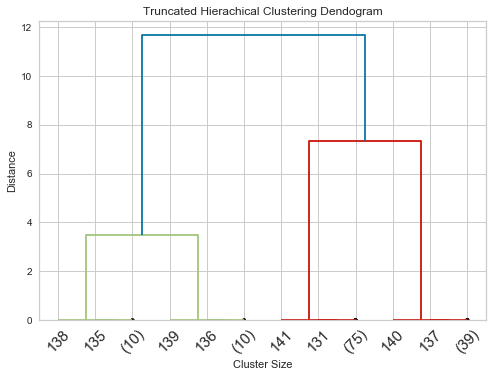

In [3074]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachical Clustering Dendogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [3075]:
Agg = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
Agg.fit_predict(dfch[['RelationClient']])

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [3076]:
labels = Agg.labels_
for i in range(len(labels)):
    print('Index:',dfch[['RelationClient']].index[i],'Label:',labels[i])

Index: 0 Label: 1
Index: 1 Label: 1
Index: 2 Label: 0
Index: 3 Label: 0
Index: 4 Label: 0
Index: 5 Label: 0
Index: 6 Label: 0
Index: 7 Label: 0
Index: 8 Label: 0
Index: 9 Label: 0
Index: 10 Label: 0
Index: 11 Label: 0
Index: 12 Label: 0
Index: 13 Label: 0
Index: 14 Label: 0
Index: 15 Label: 0
Index: 16 Label: 0
Index: 17 Label: 0
Index: 18 Label: 0
Index: 19 Label: 1
Index: 20 Label: 1
Index: 21 Label: 0
Index: 22 Label: 1
Index: 23 Label: 1
Index: 24 Label: 0
Index: 25 Label: 1
Index: 26 Label: 1
Index: 27 Label: 0
Index: 28 Label: 0
Index: 29 Label: 0
Index: 30 Label: 0
Index: 31 Label: 0
Index: 32 Label: 0
Index: 33 Label: 0
Index: 34 Label: 0
Index: 35 Label: 0
Index: 36 Label: 0
Index: 37 Label: 0
Index: 38 Label: 0
Index: 39 Label: 0
Index: 40 Label: 0
Index: 41 Label: 0
Index: 42 Label: 0
Index: 43 Label: 0
Index: 44 Label: 0
Index: 45 Label: 0
Index: 46 Label: 0
Index: 47 Label: 0
Index: 48 Label: 1
Index: 49 Label: 1
Index: 50 Label: 0
Index: 51 Label: 0
Index: 52 Label: 0
Ind

In [3077]:
l =pd.DataFrame(labels)
l[0].value_counts()

0    118
1     24
Name: 0, dtype: int64

In [3078]:
dfch['churn_Client'] = l

In [3079]:
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client
0,6.0,4.0,6.0,6.0,5.0,8.0,8.0,1.0,Other groups,1
1,4.0,3.0,4.0,6.0,5.0,9.0,9.0,1.0,Unsatisfied by quality_price,1
2,6.0,6.0,5.0,6.0,6.0,28.0,28.0,1.0,Other groups,0
3,4.0,5.0,3.0,5.0,4.0,50.0,50.0,1.0,Unsatisfied by quality_price,0
4,6.0,6.0,6.0,6.0,6.0,79.0,79.0,2.0,Other groups,0
...,...,...,...,...,...,...,...,...,...,...
137,6.0,6.0,5.0,6.0,5.0,1346.0,1346.0,1.0,Other groups,0
138,6.0,4.0,6.0,6.0,5.0,1370.0,1370.0,1.0,Other groups,1
139,4.0,3.0,4.0,6.0,5.0,1371.0,1371.0,1.0,Unsatisfied by quality_price,1
140,6.0,6.0,5.0,6.0,5.0,1390.0,1390.0,1.0,Other groups,0


In [3080]:
data1 = dfch[dfch['churn_Client']==1]
data1

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client
0,6.0,4.0,6.0,6.0,5.0,8.0,8.0,1.0,Other groups,1
1,4.0,3.0,4.0,6.0,5.0,9.0,9.0,1.0,Unsatisfied by quality_price,1
19,6.0,4.0,6.0,6.0,5.0,190.0,190.0,1.0,Other groups,1
20,4.0,3.0,4.0,6.0,5.0,191.0,191.0,1.0,Unsatisfied by quality_price,1
22,6.0,4.0,6.0,6.0,5.0,217.0,217.0,1.0,Other groups,1
23,4.0,3.0,4.0,6.0,5.0,218.0,218.0,1.0,Unsatisfied by quality_price,1
25,6.0,4.0,6.0,6.0,5.0,250.0,250.0,1.0,Other groups,1
26,4.0,3.0,4.0,6.0,5.0,251.0,251.0,1.0,Unsatisfied by quality_price,1
48,6.0,4.0,6.0,6.0,5.0,526.0,526.0,1.0,Other groups,1
49,4.0,3.0,4.0,6.0,5.0,527.0,527.0,1.0,Unsatisfied by quality_price,1


In [3081]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,24.0,5.00,1.021508,4.0,4.0,5.0,6.00,6.0
RelationClient,24.0,3.50,0.510754,3.0,3.0,3.5,4.00,4.0
Commercial,24.0,5.00,1.021508,4.0,4.0,5.0,6.00,6.0
Reseau,24.0,6.00,0.000000,6.0,6.0,6.0,6.00,6.0
Internet,24.0,5.00,0.000000,5.0,5.0,5.0,5.00,5.0
Client_PK,24.0,712.75,477.229072,8.0,242.0,722.0,1174.25,1371.0
Company_PK,24.0,712.75,477.229072,8.0,242.0,722.0,1174.25,1371.0
Region_PK,24.0,1.00,0.000000,1.0,1.0,1.0,1.00,1.0
churn_Client,24.0,1.00,0.000000,1.0,1.0,1.0,1.00,1.0


In [3082]:
for i in data1.columns:
    print(data1[i].value_counts())

4.0    12
6.0    12
Name: Quality_Price, dtype: int64
3.0    12
4.0    12
Name: RelationClient, dtype: int64
4.0    12
6.0    12
Name: Commercial, dtype: int64
6.0    24
Name: Reseau, dtype: int64
5.0    24
Name: Internet, dtype: int64
1371.0    1
1370.0    1
9.0       1
190.0     1
191.0     1
217.0     1
218.0     1
250.0     1
251.0     1
526.0     1
527.0     1
708.0     1
709.0     1
735.0     1
736.0     1
768.0     1
769.0     1
1128.0    1
1129.0    1
1310.0    1
1311.0    1
1337.0    1
1338.0    1
8.0       1
Name: Client_PK, dtype: int64
1371.0    1
1370.0    1
9.0       1
190.0     1
191.0     1
217.0     1
218.0     1
250.0     1
251.0     1
526.0     1
527.0     1
708.0     1
709.0     1
735.0     1
736.0     1
768.0     1
769.0     1
1128.0    1
1129.0    1
1310.0    1
1311.0    1
1337.0    1
1338.0    1
8.0       1
Name: Company_PK, dtype: int64
1.0    24
Name: Region_PK, dtype: int64
Other groups                    12
Unsatisfied by quality_price    12
Name: churn_Qual_

In [3083]:
data1 = dfch[dfch['churn_Client']==0]
data1

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client
2,6.0,6.0,5.0,6.0,6.0,28.0,28.0,1.0,Other groups,0
3,4.0,5.0,3.0,5.0,4.0,50.0,50.0,1.0,Unsatisfied by quality_price,0
4,6.0,6.0,6.0,6.0,6.0,79.0,79.0,2.0,Other groups,0
5,6.0,6.0,6.0,5.0,6.0,90.0,90.0,2.0,Other groups,0
6,6.0,6.0,6.0,5.0,7.0,91.0,91.0,2.0,Other groups,0
...,...,...,...,...,...,...,...,...,...,...
131,5.0,5.0,6.0,6.0,6.0,1291.0,1291.0,1.0,Unsatisfied by quality_price,0
134,6.0,6.0,5.0,6.0,5.0,1319.0,1319.0,1.0,Other groups,0
137,6.0,6.0,5.0,6.0,5.0,1346.0,1346.0,1.0,Other groups,0
140,6.0,6.0,5.0,6.0,5.0,1390.0,1390.0,1.0,Other groups,0


In [3084]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,118.0,5.398305,0.668457,4.0,5.00,5.5,6.00,6.0
RelationClient,118.0,5.347458,0.478193,5.0,5.00,5.0,6.00,6.0
Commercial,118.0,5.644068,0.862568,3.0,5.00,6.0,6.00,7.0
Reseau,118.0,6.483051,0.912712,5.0,6.00,7.0,7.00,8.0
Internet,118.0,6.016949,0.727753,4.0,6.00,6.0,6.00,7.0
Client_PK,118.0,744.322034,399.187763,28.0,391.25,766.0,1104.75,1412.0
Company_PK,118.0,744.322034,399.187763,28.0,391.25,766.0,1104.75,1412.0
Region_PK,118.0,1.644068,0.832311,1.0,1.00,1.0,2.00,4.0
churn_Client,118.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [3085]:
for i in data1.columns:
    print(data1[i].value_counts())

6.0    59
5.0    47
4.0    12
Name: Quality_Price, dtype: int64
5.0    77
6.0    41
Name: RelationClient, dtype: int64
6.0    64
5.0    36
7.0    12
3.0     6
Name: Commercial, dtype: int64
7.0    46
6.0    38
5.0    19
8.0    15
Name: Reseau, dtype: int64
6.0    74
7.0    26
5.0    12
4.0     6
Name: Internet, dtype: int64
1319.0    1
666.0     1
396.0     1
397.0     1
398.0     1
         ..
663.0     1
665.0     1
1277.0    1
671.0     1
28.0      1
Name: Client_PK, Length: 118, dtype: int64
1319.0    1
666.0     1
396.0     1
397.0     1
398.0     1
         ..
663.0     1
665.0     1
1277.0    1
671.0     1
28.0      1
Name: Company_PK, Length: 118, dtype: int64
1.0    60
2.0    49
4.0     9
Name: Region_PK, dtype: int64
Other groups                    59
Unsatisfied by quality_price    59
Name: churn_Qual_Price, dtype: int64
0    118
Name: churn_Client, dtype: int64


In [3086]:
j=0
for i in dfch['churn_Client']:
    if i==1:
        dfch['churn_Client'][j] = "Unsatisfied by relationship with customers"
        j=j+1
    else:
        dfch['churn_Client'][j] = "Other groups"
        j=j+1

C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\meddhafer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [3087]:
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client
0,6.0,4.0,6.0,6.0,5.0,8.0,8.0,1.0,Other groups,Unsatisfied by relationship with customers
1,4.0,3.0,4.0,6.0,5.0,9.0,9.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers
2,6.0,6.0,5.0,6.0,6.0,28.0,28.0,1.0,Other groups,Other groups
3,4.0,5.0,3.0,5.0,4.0,50.0,50.0,1.0,Unsatisfied by quality_price,Other groups
4,6.0,6.0,6.0,6.0,6.0,79.0,79.0,2.0,Other groups,Other groups
...,...,...,...,...,...,...,...,...,...,...
137,6.0,6.0,5.0,6.0,5.0,1346.0,1346.0,1.0,Other groups,Other groups
138,6.0,4.0,6.0,6.0,5.0,1370.0,1370.0,1.0,Other groups,Unsatisfied by relationship with customers
139,4.0,3.0,4.0,6.0,5.0,1371.0,1371.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers
140,6.0,6.0,5.0,6.0,5.0,1390.0,1390.0,1.0,Other groups,Other groups


In [3088]:
Z = linkage(dfch[['Commercial']],'ward')

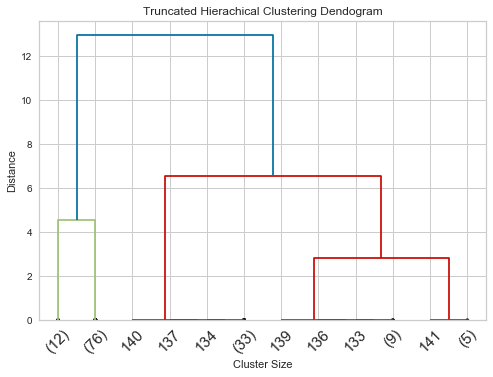

In [3089]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachical Clustering Dendogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [3090]:
Agg = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
Agg.fit_predict(dfch[['Commercial']])

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [3091]:
labels = Agg.labels_
for i in range(len(labels)):
    print('Index:',dfch[['Commercial']].index[i],'Label:',labels[i])

Index: 0 Label: 1
Index: 1 Label: 0
Index: 2 Label: 0
Index: 3 Label: 0
Index: 4 Label: 1
Index: 5 Label: 1
Index: 6 Label: 1
Index: 7 Label: 1
Index: 8 Label: 1
Index: 9 Label: 0
Index: 10 Label: 0
Index: 11 Label: 0
Index: 12 Label: 0
Index: 13 Label: 1
Index: 14 Label: 1
Index: 15 Label: 1
Index: 16 Label: 1
Index: 17 Label: 1
Index: 18 Label: 1
Index: 19 Label: 1
Index: 20 Label: 0
Index: 21 Label: 0
Index: 22 Label: 1
Index: 23 Label: 0
Index: 24 Label: 0
Index: 25 Label: 1
Index: 26 Label: 0
Index: 27 Label: 0
Index: 28 Label: 0
Index: 29 Label: 1
Index: 30 Label: 1
Index: 31 Label: 1
Index: 32 Label: 1
Index: 33 Label: 1
Index: 34 Label: 0
Index: 35 Label: 0
Index: 36 Label: 0
Index: 37 Label: 0
Index: 38 Label: 1
Index: 39 Label: 1
Index: 40 Label: 1
Index: 41 Label: 1
Index: 42 Label: 1
Index: 43 Label: 1
Index: 44 Label: 1
Index: 45 Label: 1
Index: 46 Label: 1
Index: 47 Label: 1
Index: 48 Label: 1
Index: 49 Label: 0
Index: 50 Label: 0
Index: 51 Label: 0
Index: 52 Label: 1
Ind

In [3092]:
l =pd.DataFrame(labels)
l[0].value_counts()

1    88
0    54
Name: 0, dtype: int64

In [3093]:
dfch['churn_Commerciale'] = l

In [3094]:
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client,churn_Commerciale
0,6.0,4.0,6.0,6.0,5.0,8.0,8.0,1.0,Other groups,Unsatisfied by relationship with customers,1
1,4.0,3.0,4.0,6.0,5.0,9.0,9.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,0
2,6.0,6.0,5.0,6.0,6.0,28.0,28.0,1.0,Other groups,Other groups,0
3,4.0,5.0,3.0,5.0,4.0,50.0,50.0,1.0,Unsatisfied by quality_price,Other groups,0
4,6.0,6.0,6.0,6.0,6.0,79.0,79.0,2.0,Other groups,Other groups,1
...,...,...,...,...,...,...,...,...,...,...,...
137,6.0,6.0,5.0,6.0,5.0,1346.0,1346.0,1.0,Other groups,Other groups,0
138,6.0,4.0,6.0,6.0,5.0,1370.0,1370.0,1.0,Other groups,Unsatisfied by relationship with customers,1
139,4.0,3.0,4.0,6.0,5.0,1371.0,1371.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,0
140,6.0,6.0,5.0,6.0,5.0,1390.0,1390.0,1.0,Other groups,Other groups,0


In [3095]:
data1 = dfch[dfch['churn_Commerciale']==0]
data1

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client,churn_Commerciale
1,4.0,3.0,4.0,6.0,5.0,9.0,9.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,0
2,6.0,6.0,5.0,6.0,6.0,28.0,28.0,1.0,Other groups,Other groups,0
3,4.0,5.0,3.0,5.0,4.0,50.0,50.0,1.0,Unsatisfied by quality_price,Other groups,0
9,5.0,6.0,5.0,6.0,6.0,145.0,145.0,1.0,Unsatisfied by quality_price,Other groups,0
10,5.0,5.0,5.0,7.0,6.0,146.0,146.0,1.0,Unsatisfied by quality_price,Other groups,0
11,6.0,6.0,5.0,7.0,6.0,147.0,147.0,1.0,Other groups,Other groups,0
12,5.0,5.0,5.0,8.0,5.0,148.0,148.0,1.0,Unsatisfied by quality_price,Other groups,0
20,4.0,3.0,4.0,6.0,5.0,191.0,191.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,0
21,6.0,6.0,5.0,6.0,6.0,199.0,199.0,1.0,Other groups,Other groups,0
23,4.0,3.0,4.0,6.0,5.0,218.0,218.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,0


In [3096]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,54.0,5.000000,0.824163,4.0,4.00,5.0,6.0,6.0
RelationClient,54.0,5.000000,1.165543,3.0,5.00,5.0,6.0,6.0
Commercial,54.0,4.555556,0.691366,3.0,4.00,5.0,5.0,5.0
Reseau,54.0,6.296296,0.792170,5.0,6.00,6.0,7.0,8.0
Internet,54.0,5.333333,0.672927,4.0,5.00,5.0,6.0,6.0
Client_PK,54.0,730.925926,439.775279,9.0,315.75,726.5,1122.0,1412.0
Company_PK,54.0,730.925926,439.775279,9.0,315.75,726.5,1122.0,1412.0
Region_PK,54.0,1.166667,0.693637,1.0,1.00,1.0,1.0,4.0
churn_Commerciale,54.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0


In [3097]:
for i in data1.columns:
    print(data1[i].value_counts())

5.0    18
6.0    18
4.0    18
Name: Quality_Price, dtype: int64
6.0    24
5.0    18
3.0    12
Name: RelationClient, dtype: int64
5.0    36
4.0    12
3.0     6
Name: Commercial, dtype: int64
6.0    31
7.0    12
5.0     6
8.0     5
Name: Reseau, dtype: int64
6.0    24
5.0    24
4.0     6
Name: Internet, dtype: int64
1371.0    1
292.0     1
666.0     1
665.0     1
664.0     1
663.0     1
568.0     1
546.0     1
527.0     1
390.0     1
389.0     1
388.0     1
387.0     1
270.0     1
1319.0    1
251.0     1
226.0     1
218.0     1
199.0     1
191.0     1
148.0     1
147.0     1
146.0     1
145.0     1
50.0      1
28.0      1
709.0     1
717.0     1
736.0     1
744.0     1
1311.0    1
1267.0    1
1265.0    1
1129.0    1
1101.0    1
1099.0    1
1412.0    1
1390.0    1
1346.0    1
1338.0    1
1268.0    1
1266.0    1
1170.0    1
1148.0    1
1100.0    1
1098.0    1
908.0     1
907.0     1
906.0     1
905.0     1
810.0     1
788.0     1
769.0     1
9.0       1
Name: Client_PK, dtype: int64
1371.0

In [3098]:
j=0
for i in dfch['churn_Commerciale']:
    if i==0:
        dfch['churn_Commerciale'][j] = "Unsatisfied by Commercial sector"
        j=j+1
    else:
        dfch['churn_Commerciale'][j] = "Other groups"
        j=j+1

C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\meddhafer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from

In [3099]:
Z = linkage(dfch[['Internet']],'ward')

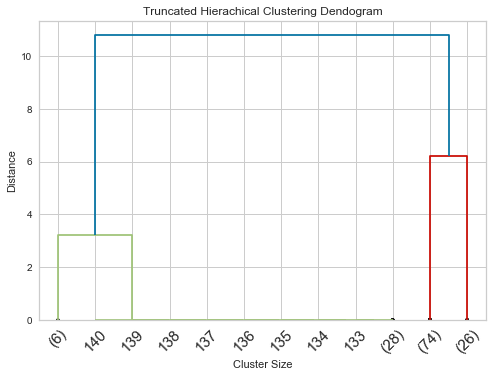

In [3100]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachical Clustering Dendogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [3101]:
Agg = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
Agg.fit_predict(dfch[['Internet']])

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [3102]:
labels = Agg.labels_
for i in range(len(labels)):
    print('Index:',dfch[['Internet']].index[i],'Label:',labels[i])

Index: 0 Label: 1
Index: 1 Label: 1
Index: 2 Label: 0
Index: 3 Label: 1
Index: 4 Label: 0
Index: 5 Label: 0
Index: 6 Label: 0
Index: 7 Label: 0
Index: 8 Label: 0
Index: 9 Label: 0
Index: 10 Label: 0
Index: 11 Label: 0
Index: 12 Label: 1
Index: 13 Label: 0
Index: 14 Label: 0
Index: 15 Label: 0
Index: 16 Label: 0
Index: 17 Label: 0
Index: 18 Label: 0
Index: 19 Label: 1
Index: 20 Label: 1
Index: 21 Label: 0
Index: 22 Label: 1
Index: 23 Label: 1
Index: 24 Label: 0
Index: 25 Label: 1
Index: 26 Label: 1
Index: 27 Label: 0
Index: 28 Label: 1
Index: 29 Label: 0
Index: 30 Label: 0
Index: 31 Label: 0
Index: 32 Label: 0
Index: 33 Label: 0
Index: 34 Label: 0
Index: 35 Label: 0
Index: 36 Label: 0
Index: 37 Label: 1
Index: 38 Label: 0
Index: 39 Label: 0
Index: 40 Label: 0
Index: 41 Label: 0
Index: 42 Label: 0
Index: 43 Label: 0
Index: 44 Label: 0
Index: 45 Label: 0
Index: 46 Label: 0
Index: 47 Label: 0
Index: 48 Label: 1
Index: 49 Label: 1
Index: 50 Label: 0
Index: 51 Label: 1
Index: 52 Label: 0
Ind

In [3103]:
l =pd.DataFrame(labels)
l[0].value_counts()

0    100
1     42
Name: 0, dtype: int64

In [3104]:
dfch['churn_Internet'] = l

In [3105]:
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client,churn_Commerciale,churn_Internet
0,6.0,4.0,6.0,6.0,5.0,8.0,8.0,1.0,Other groups,Unsatisfied by relationship with customers,Other groups,1
1,4.0,3.0,4.0,6.0,5.0,9.0,9.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,1
2,6.0,6.0,5.0,6.0,6.0,28.0,28.0,1.0,Other groups,Other groups,Unsatisfied by Commercial sector,0
3,4.0,5.0,3.0,5.0,4.0,50.0,50.0,1.0,Unsatisfied by quality_price,Other groups,Unsatisfied by Commercial sector,1
4,6.0,6.0,6.0,6.0,6.0,79.0,79.0,2.0,Other groups,Other groups,Other groups,0
...,...,...,...,...,...,...,...,...,...,...,...,...
137,6.0,6.0,5.0,6.0,5.0,1346.0,1346.0,1.0,Other groups,Other groups,Unsatisfied by Commercial sector,1
138,6.0,4.0,6.0,6.0,5.0,1370.0,1370.0,1.0,Other groups,Unsatisfied by relationship with customers,Other groups,1
139,4.0,3.0,4.0,6.0,5.0,1371.0,1371.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,1
140,6.0,6.0,5.0,6.0,5.0,1390.0,1390.0,1.0,Other groups,Other groups,Unsatisfied by Commercial sector,1


In [3106]:
data1 = dfch[dfch['churn_Internet']==1]
data1

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client,churn_Commerciale,churn_Internet
0,6.0,4.0,6.0,6.0,5.0,8.0,8.0,1.0,Other groups,Unsatisfied by relationship with customers,Other groups,1
1,4.0,3.0,4.0,6.0,5.0,9.0,9.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,1
3,4.0,5.0,3.0,5.0,4.0,50.0,50.0,1.0,Unsatisfied by quality_price,Other groups,Unsatisfied by Commercial sector,1
12,5.0,5.0,5.0,8.0,5.0,148.0,148.0,1.0,Unsatisfied by quality_price,Other groups,Unsatisfied by Commercial sector,1
19,6.0,4.0,6.0,6.0,5.0,190.0,190.0,1.0,Other groups,Unsatisfied by relationship with customers,Other groups,1
20,4.0,3.0,4.0,6.0,5.0,191.0,191.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,1
22,6.0,4.0,6.0,6.0,5.0,217.0,217.0,1.0,Other groups,Unsatisfied by relationship with customers,Other groups,1
23,4.0,3.0,4.0,6.0,5.0,218.0,218.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,1
25,6.0,4.0,6.0,6.0,5.0,250.0,250.0,1.0,Other groups,Unsatisfied by relationship with customers,Other groups,1
26,4.0,3.0,4.0,6.0,5.0,251.0,251.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,1


In [3107]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,42.0,4.952381,0.909365,4.0,4.0,5.0,6.0,6.0
RelationClient,42.0,4.261905,1.013555,3.0,3.0,4.0,5.0,6.0
Commercial,42.0,4.714286,1.042645,3.0,4.0,5.0,6.0,6.0
Reseau,42.0,6.142857,0.813647,5.0,6.0,6.0,6.0,8.0
Internet,42.0,4.857143,0.354169,4.0,5.0,5.0,5.0,5.0
Client_PK,42.0,791.452381,466.434070,8.0,316.5,768.5,1243.5,1412.0
Company_PK,42.0,791.452381,466.434070,8.0,316.5,768.5,1243.5,1412.0
Region_PK,42.0,1.071429,0.462910,1.0,1.0,1.0,1.0,4.0
churn_Internet,42.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [3108]:
for i in data1.columns:
    print(data1[i].value_counts())

4.0    18
6.0    16
5.0     8
Name: Quality_Price, dtype: int64
5.0    13
3.0    12
4.0    12
6.0     5
Name: RelationClient, dtype: int64
5.0    12
4.0    12
6.0    12
3.0     6
Name: Commercial, dtype: int64
6.0    29
5.0     6
8.0     5
7.0     2
Name: Reseau, dtype: int64
5.0    36
4.0     6
Name: Internet, dtype: int64
1412.0    1
292.0     1
735.0     1
709.0     1
708.0     1
666.0     1
568.0     1
527.0     1
526.0     1
390.0     1
251.0     1
1390.0    1
250.0     1
218.0     1
217.0     1
191.0     1
190.0     1
148.0     1
50.0      1
9.0       1
736.0     1
768.0     1
769.0     1
810.0     1
1371.0    1
1370.0    1
1346.0    1
1338.0    1
1337.0    1
1319.0    1
1311.0    1
1310.0    1
1268.0    1
1170.0    1
1129.0    1
1128.0    1
1101.0    1
1100.0    1
1099.0    1
1098.0    1
908.0     1
8.0       1
Name: Client_PK, dtype: int64
1412.0    1
292.0     1
735.0     1
709.0     1
708.0     1
666.0     1
568.0     1
527.0     1
526.0     1
390.0     1
251.0     1
1390.0  

In [3109]:
data1 = dfch[dfch['churn_Internet']==0]
data1

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client,churn_Commerciale,churn_Internet
2,6.0,6.0,5.0,6.0,6.0,28.0,28.0,1.0,Other groups,Other groups,Unsatisfied by Commercial sector,0
4,6.0,6.0,6.0,6.0,6.0,79.0,79.0,2.0,Other groups,Other groups,Other groups,0
5,6.0,6.0,6.0,5.0,6.0,90.0,90.0,2.0,Other groups,Other groups,Other groups,0
6,6.0,6.0,6.0,5.0,7.0,91.0,91.0,2.0,Other groups,Other groups,Other groups,0
7,5.0,5.0,6.0,8.0,6.0,137.0,137.0,1.0,Unsatisfied by quality_price,Other groups,Other groups,0
...,...,...,...,...,...,...,...,...,...,...,...,...
127,6.0,5.0,6.0,7.0,7.0,1274.0,1274.0,4.0,Other groups,Other groups,Other groups,0
128,6.0,5.0,6.0,7.0,7.0,1275.0,1275.0,4.0,Other groups,Other groups,Other groups,0
129,6.0,5.0,6.0,7.0,7.0,1276.0,1276.0,4.0,Other groups,Other groups,Other groups,0
130,6.0,5.0,6.0,7.0,7.0,1277.0,1277.0,2.0,Other groups,Other groups,Other groups,0


In [3110]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality_Price,100.0,5.49,0.611258,4.0,5.00,6.0,6.00,6.0
RelationClient,100.0,5.36,0.482418,5.0,5.00,5.0,6.00,6.0
Commercial,100.0,5.88,0.590839,5.0,6.00,6.0,6.00,7.0
Reseau,100.0,6.51,0.846800,5.0,6.00,7.0,7.00,8.0
Internet,100.0,6.26,0.440844,6.0,6.00,6.0,7.00,7.0
Client_PK,100.0,716.95,386.880332,28.0,388.75,682.0,1090.25,1291.0
Company_PK,100.0,716.95,386.880332,28.0,388.75,682.0,1090.25,1291.0
Region_PK,100.0,1.73,0.827006,1.0,1.00,2.0,2.00,4.0
churn_Internet,100.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0


In [3111]:
for i in data1.columns:
    print(data1[i].value_counts())

6.0    55
5.0    39
4.0     6
Name: Quality_Price, dtype: int64
5.0    64
6.0    36
Name: RelationClient, dtype: int64
6.0    64
5.0    24
7.0    12
Name: Commercial, dtype: int64
7.0    44
6.0    33
5.0    13
8.0    10
Name: Reseau, dtype: int64
6.0    74
7.0    26
Name: Internet, dtype: int64
1291.0    1
656.0     1
395.0     1
396.0     1
397.0     1
         ..
1267.0    1
663.0     1
665.0     1
671.0     1
28.0      1
Name: Client_PK, Length: 100, dtype: int64
1291.0    1
656.0     1
395.0     1
396.0     1
397.0     1
         ..
1267.0    1
663.0     1
665.0     1
671.0     1
28.0      1
Name: Company_PK, Length: 100, dtype: int64
2.0    49
1.0    43
4.0     8
Name: Region_PK, dtype: int64
Other groups                    55
Unsatisfied by quality_price    45
Name: churn_Qual_Price, dtype: int64
Other groups    100
Name: churn_Client, dtype: int64
Other groups                        76
Unsatisfied by Commercial sector    24
Name: churn_Commerciale, dtype: int64
0    100
Name: ch

In [3112]:
j=0
for i in dfch['churn_Internet']:
    if i==1:
        dfch['churn_Internet'][j] = "Unsatisfied by Internet"
        j=j+1
    else:
        dfch['churn_Internet'][j] = "Other groups"
        j=j+1

C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\meddhafer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\meddhafer\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [3113]:
dfch

,Quality_Price,RelationClient,Commercial,Reseau,Internet,Client_PK,Company_PK,Region_PK,churn_Qual_Price,churn_Client,churn_Commerciale,churn_Internet
0,6.0,4.0,6.0,6.0,5.0,8.0,8.0,1.0,Other groups,Unsatisfied by relationship with customers,Other groups,Unsatisfied by Internet
1,4.0,3.0,4.0,6.0,5.0,9.0,9.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Internet
2,6.0,6.0,5.0,6.0,6.0,28.0,28.0,1.0,Other groups,Other groups,Unsatisfied by Commercial sector,Other groups
3,4.0,5.0,3.0,5.0,4.0,50.0,50.0,1.0,Unsatisfied by quality_price,Other groups,Unsatisfied by Commercial sector,Unsatisfied by Internet
4,6.0,6.0,6.0,6.0,6.0,79.0,79.0,2.0,Other groups,Other groups,Other groups,Other groups
...,...,...,...,...,...,...,...,...,...,...,...,...
137,6.0,6.0,5.0,6.0,5.0,1346.0,1346.0,1.0,Other groups,Other groups,Unsatisfied by Commercial sector,Unsatisfied by Internet
138,6.0,4.0,6.0,6.0,5.0,1370.0,1370.0,1.0,Other groups,Unsatisfied by relationship with customers,Other groups,Unsatisfied by Internet
139,4.0,3.0,4.0,6.0,5.0,1371.0,1371.0,1.0,Unsatisfied by quality_price,Unsatisfied by relationship with customers,Unsatisfied by Commercial sector,Unsatisfied by Internet
140,6.0,6.0,5.0,6.0,5.0,1390.0,1390.0,1.0,Other groups,Other groups,Unsatisfied by Commercial sector,Unsatisfied by Internet


In [3114]:
dfch.to_excel(r"C:\Users\meddhafer\notebook\data\groups.xlsx", header=True)